In [235]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


# Data understanding

This week's project requires us to implement a K-nearest neighbor (kNN) classifier  and a Naive Bayes classifier. Once we conduct the experiments, we will calculate the resulting metrics:



Experimental Procedure:



- Download the two datasets from the given links:
 - Dataset 1 Source: [Train Dataset Source: Link, Test Dataset Source: Link]
 - Dataset 2 Source: [Link]


  Randomly partition each dataset into two parts i.e 80 - 20  sets.
- For dataset 1, because we don't have the label for the test set, we will use - the train set to create train and test data (i.e. splitting further), then - - perform K-nearest neighbor classification.
- For dataset 2, perform classification of the testing set samples using the  - - Naive Bayes Classifier.
- Compute the accuracy (percentage of correct classification).
- Report the confusion matrix of each classifier.
- Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
- Suggest and apply at least one of the optimization techniques that you learned earlier this week.
- Provide further recommendations to improve both classifiers.
    - Create a notebook for each project.  

# Data Preparation

In [236]:
import pandas as pd
import numpy as np

# from pydataset import data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [237]:
train = pd.read_csv('/content/ttrain.csv')
test = pd.read_csv('/content/ttest.csv')


In [238]:
# preview train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [240]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [241]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Data cleaning 

In [242]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [243]:
# remove null columns
train.drop('Cabin', 1, inplace= True)

In [244]:
a = ( 177 /len (train))*100
a 

19.865319865319865

The percentage of missing values is 19.86%. Therefore, it would be advisable to drop the records with null values  

In [245]:
train. dropna(inplace=True)

We should make the columns consistent by making it lowercase. 

In [246]:
# Consistency 
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [247]:
train.isna().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

The trainset has no missing value

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

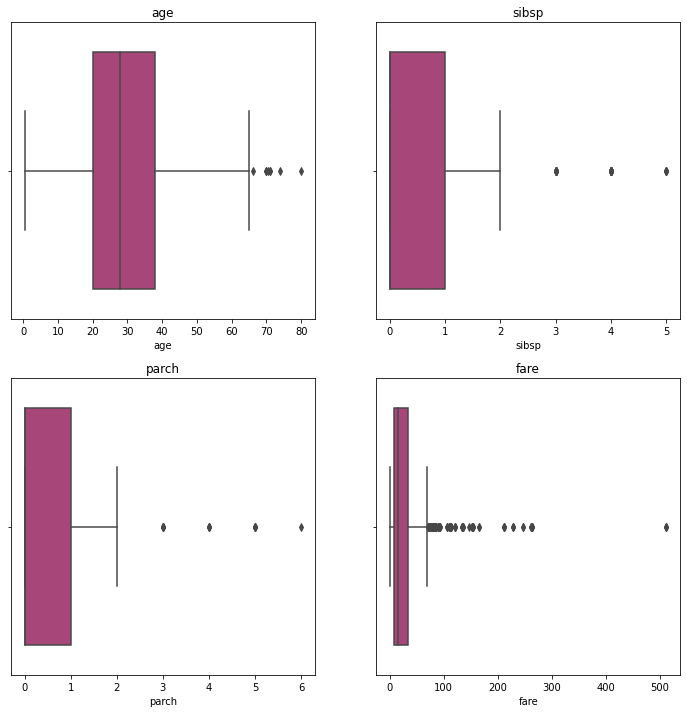

In [248]:
# Check outliers on numerical columns. 
# we save the column names onto a dictionary
boxplot_ls = {'age': 1, 'sibsp': 2, 'parch': 3, 'fare': 4}

plt.figure(figsize=(12,12))

# we make a boxplot for each numerical column
for a,i in boxplot_ls.items():
  plt.subplot(2,2,i)
  sns.boxplot(train[a], palette='magma')
  plt.title(a)



In [249]:
# Lets check for duplicates in the dataframe
train.duplicated().sum()

0

The dataset contains no duplicated data. 

# Feature Engineering

In [250]:
# Droping irrelevant column
print (train.columns)

# List of columns to drop 
dropcol = ['passengerid', 'name', 'ticket', 'fare']

# Dropping the columns
train.drop(dropcol, 1, inplace=True)
print('Columns dropped successfully')

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')
Columns dropped successfully


In [251]:
train.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
embarked     object
dtype: object

Looking at the data we see that the passengerid, name, ticket, and maybe fare and embarked are not that useful in predicting the survival rate.  Therefore we should drop the columns that are not useful. 


In [252]:
train.sample(3)

,survived,pclass,sex,age,sibsp,parch,embarked
436,0,3,female,21.0,2,2,S
38,0,3,female,18.0,2,0,S
638,0,3,female,41.0,0,5,S


# Exploratory Data Analysis

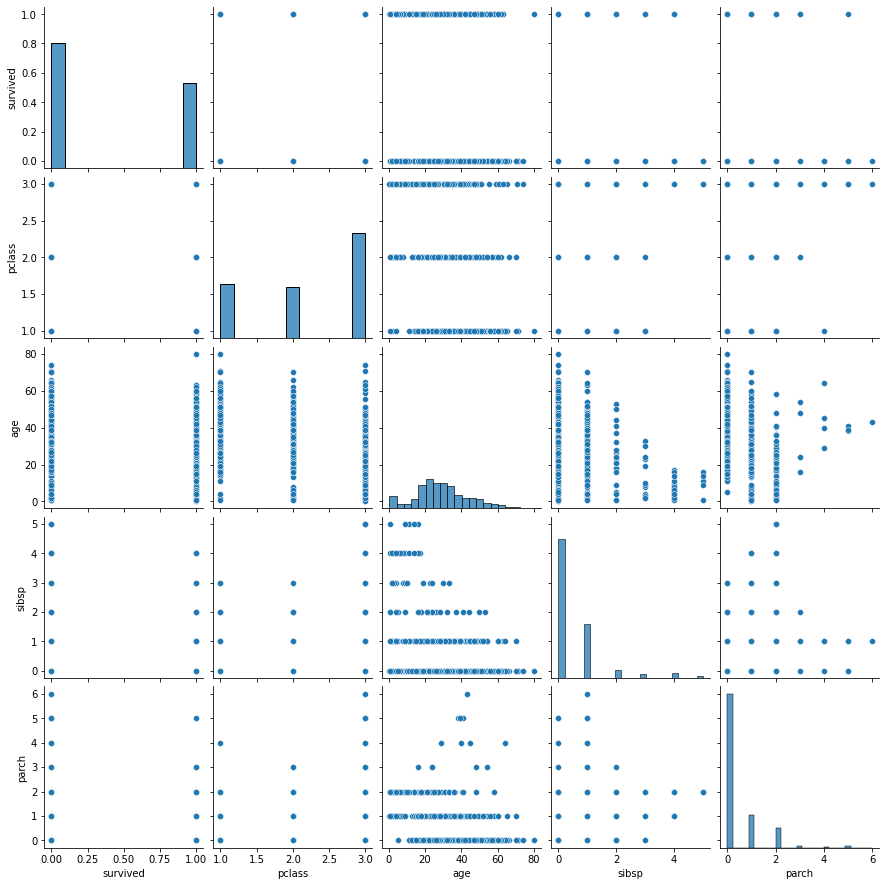

In [253]:
sns.pairplot(train)

From the pairplot it is clear to see that there is very little correlation between the numerical columns. 

However, the 
- age column is Gaussian or normally distributed
- The sibs and parch columns are positively skewed. 

In [254]:
import pandas_profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(train, title="Titanic", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Bivariate 

In [255]:
# We should start with a correlation plot.
corr = train.corr()
corr

,survived,pclass,age,sibsp,parch
survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265
pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666
age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896
sibsp,-0.015523,0.065187,-0.307351,1.000000,0.383338
parch,0.095265,0.023666,-0.187896,0.383338,1.000000


In [256]:
train.head(4)

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S


In [257]:
# We should transform the sex labels to binary 
sex = pd.get_dummies(train['sex'], drop_first= True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [258]:
# Now we should drop the sex column, and append the dataframe with the sex:male column
trainb = train.copy()
trainb.drop('sex', 1, inplace=True)
 


In [259]:
# concat the sex column
trainb = pd.concat([train, sex], axis = 1, join= 'outer')
trainb

,survived,pclass,sex,age,sibsp,parch,embarked,male
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,0
4,0,3,male,35.0,0,0,S,1
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,Q,0
886,0,2,male,27.0,0,0,S,1
887,1,1,female,19.0,0,0,S,0
889,1,1,male,26.0,0,0,C,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survied v Pclass')

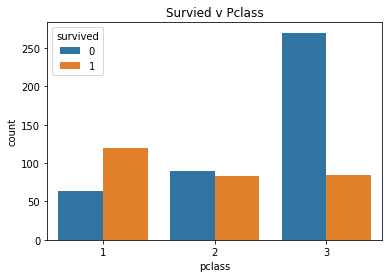

In [260]:
# Countplots of Passanger class and Survived 
sns.countplot(train['pclass'], hue= train['survived'])
plt.title('Survied v Pclass')

The majority of the survived passangers were in first class. 

Text(0.5, 1.0, 'Histogram of age')

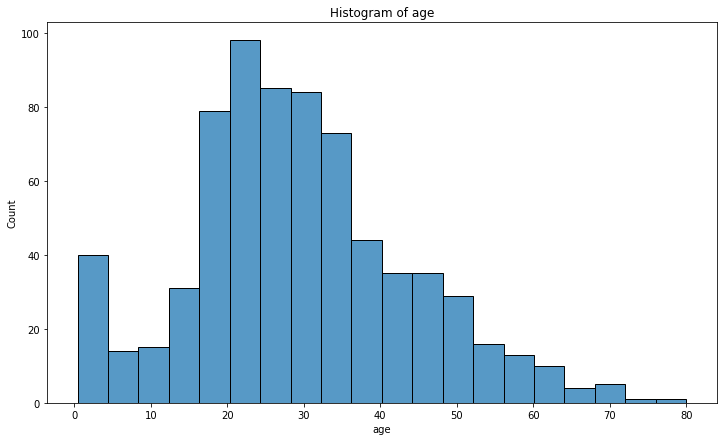

In [261]:
# countplot of age and survived
plt.figure (figsize=(12,7))
sns.histplot(train['age'], stat = 'count')
plt.title('Histogram of age')

Majority of the passanger are between the age of 20-25 from the hist plot. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survied v Pclass')

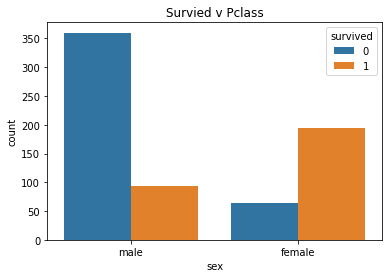

In [262]:
# Countplots of Passanger class and Survived 
sns.countplot(train['sex'], hue= train['survived'])
plt.title('Survied v Pclass')

We can see that more females survived the Titanic. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survied v Embarked')

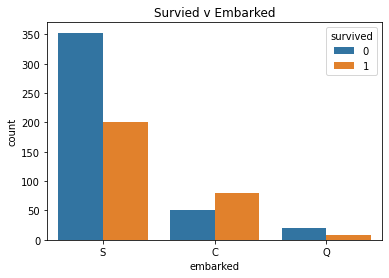

In [263]:
sns.countplot(train['embarked'], hue= train['survived'])
plt.title('Survied v Embarked')

The passengers that embarked from Southampton made for the majority of the population and many of them survied. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survied v Parents on board')

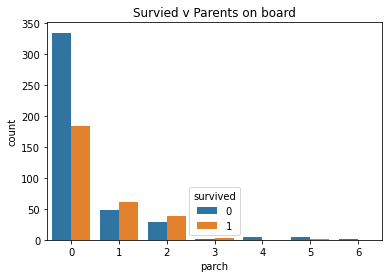

In [264]:
sns.countplot(train['parch'], hue= train['survived'])
plt.title('Survied v Parents on board')

          survived    pclass       age     sibsp     parch      male
survived  1.000000 -0.356462 -0.082446 -0.015523  0.095265 -0.536762
pclass   -0.356462  1.000000 -0.365902  0.065187  0.023666  0.150826
age      -0.082446 -0.365902  1.000000 -0.307351 -0.187896  0.099037
sibsp    -0.015523  0.065187 -0.307351  1.000000  0.383338 -0.106296
parch     0.095265  0.023666 -0.187896  0.383338  1.000000 -0.249543
male     -0.536762  0.150826  0.099037 -0.106296 -0.249543  1.000000


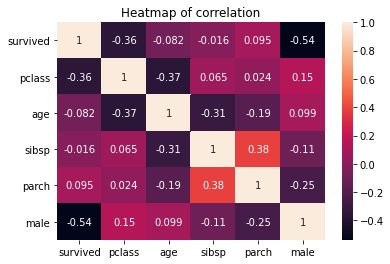

In [265]:
# Lets check for the correlarion and plot a heatmap to show the realtionship 
corr = trainb.corr()
print(corr)
plt.title('Heatmap of correlation')
sns.heatmap(corr, annot= True)

None of the columns have high correlation which is good for the Machine learning model 

#### EDA conclusions
From the EDA we can come to several conclusions:
1. majority of the survived population was comprised of females. 
2. Passengers who embarked from Southamptom had a higher chance of survival. 
3. The largest population of the passengers was about 20-25 years of age. 
4. People with no family members on board had a higher chance of surval. 

# Modelling 

In [266]:
# First lets check for Multicolinearity
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,survived,pclass,age,sibsp,parch,male
survived,1.660365,0.579622,0.324975,0.162728,0.025227,0.795206
pclass,0.579622,1.407960,0.589460,0.105977,-0.005885,0.050180
age,0.324975,0.589460,1.366134,0.358004,0.076379,0.007344
sibsp,0.162728,0.105977,0.358004,1.274797,-0.422986,0.065859
parch,0.025227,-0.005885,0.076379,-0.422986,1.242073,0.271853
male,0.795206,0.050180,0.007344,0.065859,0.271853,1.493380


In [267]:
trainb.drop('sex', 1, inplace=True)

In [268]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
trainb.embarked = le.fit_transform(trainb['embarked'])

In [269]:
# We will perform KNN classifier to make the prediction
# first lets split the data into the features and labels
X = trainb.drop('survived', 1)
y = trainb.survived

### 80-20 Split

In [270]:
# Train test split
# We will start with a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= .2, random_state = 0)

In [271]:
# Feature Scaling


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [272]:
# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

Accuracy score =: 0.7972027972027972 ,f1 score = 0.743362831858407
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        82
           1       0.81      0.69      0.74        61

    accuracy                           0.80       143
   macro avg       0.80      0.78      0.79       143
weighted avg       0.80      0.80      0.79       143



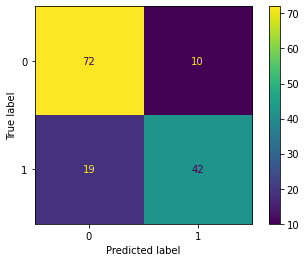

In [273]:
# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Making predictions for our train dataset
y_pred_train = classifier.predict(X_train)
plot_confusion_matrix(classifier, X_test, y_test)


The accuracy of the KNN model is around 80% using the 80- 20 split


In [274]:
# Importing Libraries neccesary for visualization. 
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA


In [275]:
# We first have to run a Principle component Analysis to reduce the fetures to a single array

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
# Lets define the fuction for making the visualization
def knn_comparison(data, k):
 X = X_train2
 y = y_train.values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(X, y)
# Plotting decision region
 plot_decision_regions(X, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel("X_train")
 plt.ylabel('y_train')
 plt.title('Knn with K='+ str(k))
 plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


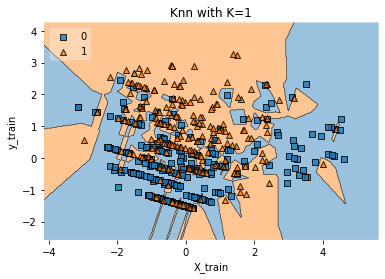

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


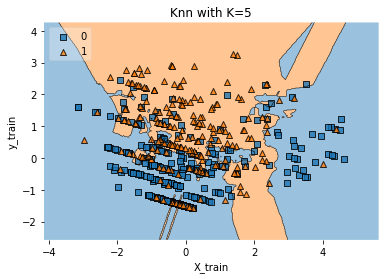

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


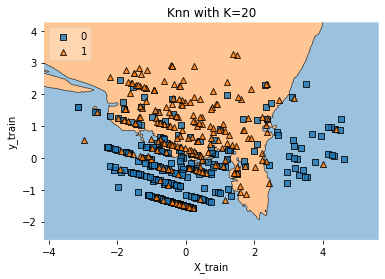

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


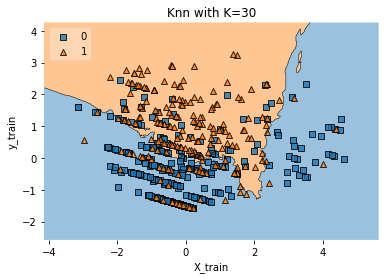

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


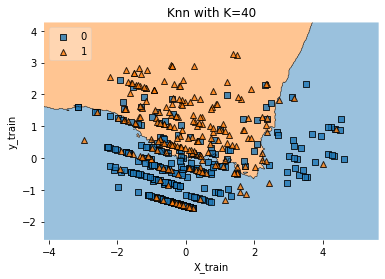

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


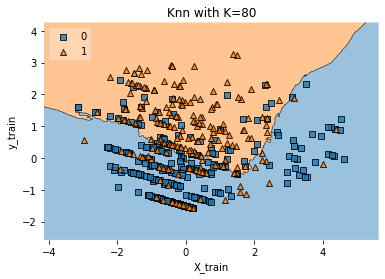

In [276]:
for i in [1,5,20,30,40,80]:
    knn_comparison(trainb, i)

From the Plots above we can see that the best plot is the one where K has a value of 1. 

In [282]:
# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=1)
classifier1.fit(X_train, y_train)

# make predictions on our test data

y_pred1 = classifier1.predict(X_test)


Accuracy score =: 0.7342657342657343 ,f1 score = 0.6935483870967742
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        82
           1       0.68      0.70      0.69        61

    accuracy                           0.73       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.73      0.73       143



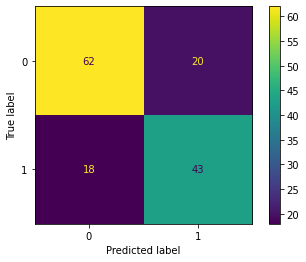

In [283]:
# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred1)} ,f1 score = {f1_score(y_test, y_pred1)}')
print(classification_report(y_test, y_pred1))
# Making predictions for our train dataset
y_pred1_train = classifier1.predict(X_train)
plot_confusion_matrix(classifier1, X_test, y_test)

The accuracy is reduced from 80 to 73 with Knnneighbors of 1

### 70 - 30 split 

Accuracy score =: 0.7616822429906542 ,f1 score = 0.7085714285714286
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       125
           1       0.72      0.70      0.71        89

    accuracy                           0.76       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.76      0.76       214



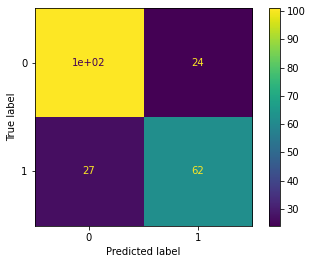

In [288]:
#splititng the data into features and labels
# 
X = trainb.drop('survived', axis=1)
y = trainb.survived

# Train Test Split 70-30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test)

The accuracy of the model in the 70-30 split is 76 percent. 

### 60-40

Accuracy score =: 0.8035087719298246 ,f1 score = 0.7586206896551724
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       169
           1       0.76      0.76      0.76       116

    accuracy                           0.80       285
   macro avg       0.80      0.80      0.80       285
weighted avg       0.80      0.80      0.80       285



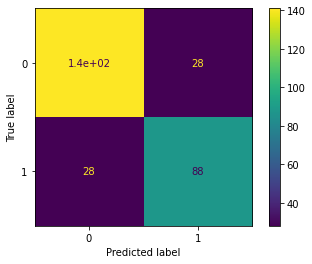

In [289]:
# splitting the data into features and labels
# 
X = trainb.drop('survived', axis=1)
y = trainb.survived

# Train Test Split (60-40)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test)


The accuracy of the 60-40 model is 80 percent 


The accuracy results for the models are:


   **model** -- **Accurracy**

- 80:20 -- 79.7% 
- 70:30 -- 76.1%
- 60:40 -- 80.3%

## Hyperparameter tuning. 


In [290]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The parameters that we can tune are listed above. 

In [296]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 30))
leaf_size = list(range(1,50))
weight_options = ['uniform', 'distance']


param_dist = dict(n_neighbors=k_range, weights=weight_options, leaf_size=leaf_size)

# Instantiate the RandomizedSearchCV model

knn = KNeighborsClassifier()
rsearch = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=20, random_state=5)

# fit
rsearch.fit(X_train, y_train)


# examine the best model
print(rsearch.best_score_)
print(rsearch.best_params_)
print(rsearch.best_estimator_)

0.812735326688815
{'weights': 'uniform', 'n_neighbors': 13, 'leaf_size': 19}
KNeighborsClassifier(algorithm='auto', leaf_size=19, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


Now we can use the best estimators parameters and apply them to our highest accuracy model which was the 60-40 model. 

Accuracy score =: 0.8 ,f1 score = 0.7510917030567684
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       169
           1       0.76      0.74      0.75       116

    accuracy                           0.80       285
   macro avg       0.79      0.79      0.79       285
weighted avg       0.80      0.80      0.80       285



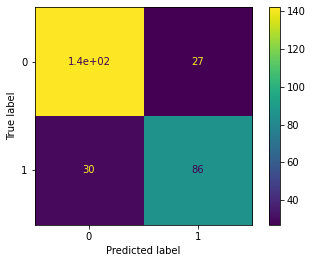

In [297]:
# splitting the data into features and labels
# 
X = trainb.drop('survived', axis=1)
y = trainb.survived

# Train Test Split (60-40)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=19, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
classifier.fit(X_train, y_train)

# make predictions on our test data

y_pred = classifier.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
plot_confusion_matrix(classifier, X_test, y_test)


Even after the parameter tuning the modelstill retains the same accuracy. 


# Challenge the Model 

We should challenge the model using a logistic regression. 

Accuracy score =: 0.7850467289719626 ,f1 score = 0.7261904761904762
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       125
           1       0.77      0.69      0.73        89

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214



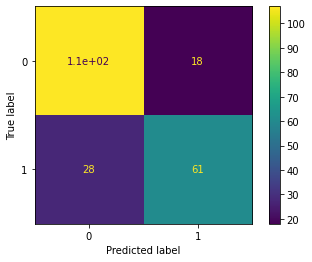

In [299]:
# Split into features and labels 
X = trainb.drop('survived', 1)
y = trainb.survived

# Train Test Split (We will use an 70-30 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# make predictions on our test data

y_pred = logreg.predict(X_test)

# Evaluating the Algorithm
 
from sklearn.metrics import classification_report, confusion_matrix
print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
plot_confusion_matrix(logreg, X_test, y_test)



A logistic regression Model yields an accuracy score of 78 which is quite goood. 

#Evaluation


We are able to achieve the prediction from the trainset. The accuracy is about 80% of the KNN classifier. 



## Follow up questions
**a). Did we have the right data?**

Yes, I believe we had the right data for analysis and modeling



**b). Do we need other data to answer our question?**

no the data is enough to make our predictions




**c). Did we have the right question?**

Yes, the question was right. 